In [1]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

/Users/Home/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Home/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time don't work with the entire dataset.
x_train = x_train[:10000]
y_train = x_train[:10000]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

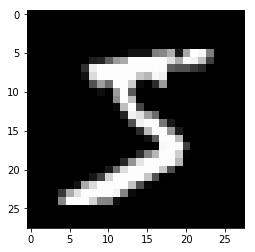

In [3]:
# Plot out a sample image (reshaped to 28 x 28)
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100 # Feel free to tweak this and see what changes you get

# Define the generator here.
# The generator should have the following layers.
# Fully connected from # noise dimensions to 256
# LeakyReLU
# Fully connected from 256 to 512
# LeakyReLU
# Fully connected from 512 to 1024
# LeakyReLU
# Fully connected from 1024 to 784 (28*28)
# tanh (To normalize our output from -1 to 1)

def generator():
    model = Sequential()
    
    model.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(1024))
    model.add(LeakyReLU())
    model.add(Dense(784))
    model.add(Activation('tanh'))
    
    return model

In [5]:
# Define the discriminator here.
# Should have the following layers
# Fully connected from 784 (28*28) to 1024
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 1024 to 512
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 512 to 256
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 256 to 1
# sigmoid (to get our probability)

def discriminator():
    model = Sequential()
    
    model.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [6]:
# Feed the generated image into the discriminator. 
# We’ll use this to train our generator end-to-end later on, 
    # while leaving the discriminator weights untouched
# Remember that we are not updating our discriminator in this step. 
# We can add existing Sequential() models to new models, just like we can with any other layer.
    # The parameters are then "passed by reference," so that they use the same internal weights.

def combine(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)
    
    return model

In [7]:
# Compile the discriminator, generator, and full GAN. 
# Probably use Adam optimizer...

LOSS = 'binary_crossentropy'
OPTIMIZER = Adam(lr=0.0002, beta_1=0.5)

# Discriminator
d = discriminator()
d.compile(loss = LOSS, optimizer = OPTIMIZER)

# Generator
g = generator()
g.compile(loss = LOSS, optimizer = OPTIMIZER)

# Full gan
dg = combine(g, d)
dg.compile(loss = LOSS, optimizer = OPTIMIZER)

In [8]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


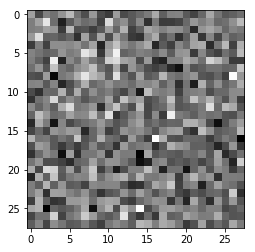

Number batches 78
0(0/78) D: 0.6840, G: 0.6855
0(1/78) D: 0.4031, G: 0.6690
0(2/78) D: 0.3807, G: 0.6497
0(3/78) D: 0.3917, G: 0.6290
0(4/78) D: 0.4109, G: 0.6080
0(5/78) D: 0.4277, G: 0.5973
0(6/78) D: 0.4354, G: 0.5902
0(7/78) D: 0.4395, G: 0.6057
0(8/78) D: 0.4378, G: 0.6343
0(9/78) D: 0.4249, G: 0.6785
0(10/78) D: 0.4113, G: 0.7278
0(11/78) D: 0.3959, G: 0.7633
0(12/78) D: 0.3923, G: 0.7856
0(13/78) D: 0.3947, G: 0.8095
0(14/78) D: 0.4026, G: 0.8068
0(15/78) D: 0.4140, G: 0.8024
0(16/78) D: 0.4267, G: 0.8160
0(17/78) D: 0.4480, G: 0.7773
0(18/78) D: 0.4479, G: 0.8084
0(19/78) D: 0.4346, G: 0.8344
0(20/78) D: 0.4078, G: 0.9019
0(21/78) D: 0.3950, G: 0.9470
0(22/78) D: 0.3934, G: 0.9673
0(23/78) D: 0.3803, G: 1.0224
0(24/78) D: 0.3868, G: 0.8999
0(25/78) D: 0.4235, G: 0.9721
0(26/78) D: 0.4089, G: 0.9319
0(27/78) D: 0.4056, G: 0.9520
0(28/78) D: 0.3969, G: 0.8903
0(29/78) D: 0.4049, G: 1.0005
0(30/78) D: 0.4044, G: 0.8719
0(31/78) D: 0.4004, G: 0.9750
0(32/78) D: 0.3726, G: 1.0596
0(

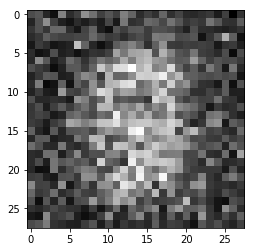

Number batches 78
1(0/78) D: 0.4750, G: 1.0734
1(1/78) D: 0.4132, G: 1.1051
1(2/78) D: 0.3937, G: 1.6461
1(3/78) D: 0.4129, G: 0.6919
1(4/78) D: 0.7019, G: 1.7645
1(5/78) D: 0.6788, G: 0.5751
1(6/78) D: 0.6428, G: 0.7679
1(7/78) D: 0.4613, G: 1.1210
1(8/78) D: 0.4920, G: 0.9013
1(9/78) D: 0.4085, G: 1.0724
1(10/78) D: 0.3909, G: 1.3948
1(11/78) D: 0.3804, G: 1.0925
1(12/78) D: 0.4372, G: 1.5677
1(13/78) D: 0.5131, G: 0.5697
1(14/78) D: 0.7410, G: 1.3888
1(15/78) D: 0.5463, G: 0.8175
1(16/78) D: 0.4668, G: 1.0519
1(17/78) D: 0.3945, G: 1.3342
1(18/78) D: 0.4227, G: 0.9178
1(19/78) D: 0.4496, G: 1.6667
1(20/78) D: 0.3565, G: 1.2766
1(21/78) D: 0.3548, G: 1.4804
1(22/78) D: 0.3570, G: 1.4251
1(23/78) D: 0.4237, G: 1.0986
1(24/78) D: 0.5010, G: 1.7120
1(25/78) D: 0.7684, G: 0.2441
1(26/78) D: 0.9513, G: 0.4653
1(27/78) D: 0.6005, G: 0.9923
1(28/78) D: 0.3056, G: 1.3951
1(29/78) D: 0.3249, G: 1.3651
1(30/78) D: 0.2607, G: 1.2058
1(31/78) D: 0.2695, G: 1.2694
1(32/78) D: 0.2738, G: 1.4498
1(

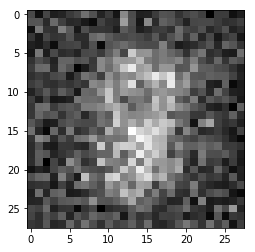

Number batches 78
2(0/78) D: 0.2086, G: 2.0745
2(1/78) D: 0.1609, G: 2.1793
2(2/78) D: 0.1489, G: 1.8702
2(3/78) D: 0.1942, G: 1.8696
2(4/78) D: 0.2413, G: 1.6670
2(5/78) D: 0.2790, G: 1.9888
2(6/78) D: 0.2984, G: 1.0124
2(7/78) D: 0.3903, G: 2.1492
2(8/78) D: 0.2699, G: 1.5929
2(9/78) D: 0.1580, G: 1.6834
2(10/78) D: 0.1543, G: 2.1966
2(11/78) D: 0.1328, G: 2.2146
2(12/78) D: 0.1262, G: 2.0316
2(13/78) D: 0.1547, G: 2.0921
2(14/78) D: 0.1694, G: 1.7756
2(15/78) D: 0.1996, G: 2.1277
2(16/78) D: 0.1765, G: 1.7887
2(17/78) D: 0.1823, G: 1.8793
2(18/78) D: 0.2039, G: 1.6806
2(19/78) D: 0.1921, G: 2.4190
2(20/78) D: 0.1166, G: 2.3910
2(21/78) D: 0.1158, G: 2.0905
2(22/78) D: 0.1148, G: 2.3768
2(23/78) D: 0.1154, G: 2.3976
2(24/78) D: 0.1087, G: 2.1370
2(25/78) D: 0.1175, G: 2.1528
2(26/78) D: 0.1272, G: 2.1755
2(27/78) D: 0.1219, G: 2.1318
2(28/78) D: 0.1269, G: 2.1484
2(29/78) D: 0.1410, G: 2.0965
2(30/78) D: 0.1567, G: 2.0668
2(31/78) D: 0.1475, G: 2.1181
2(32/78) D: 0.1276, G: 2.3258
2(

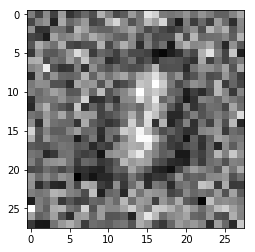

Number batches 78
3(0/78) D: 0.3224, G: 1.1939
3(1/78) D: 0.6364, G: 2.5436
3(2/78) D: 0.1519, G: 3.5485
3(3/78) D: 0.4292, G: 0.8210
3(4/78) D: 0.9158, G: 1.8339
3(5/78) D: 0.3117, G: 3.2837
3(6/78) D: 0.3003, G: 2.3257
3(7/78) D: 0.1736, G: 2.2838
3(8/78) D: 0.2301, G: 2.7443
3(9/78) D: 0.2874, G: 1.3448
3(10/78) D: 0.3955, G: 2.8130
3(11/78) D: 0.4660, G: 0.4326
3(12/78) D: 0.8020, G: 2.0637
3(13/78) D: 0.2687, G: 2.1073
3(14/78) D: 0.2699, G: 1.2137
3(15/78) D: 0.3124, G: 2.1022
3(16/78) D: 0.1903, G: 2.3616
3(17/78) D: 0.2003, G: 1.6955
3(18/78) D: 0.2527, G: 2.3493
3(19/78) D: 0.2480, G: 1.7935
3(20/78) D: 0.2735, G: 2.8248
3(21/78) D: 0.2794, G: 1.0883
3(22/78) D: 0.4648, G: 3.7839
3(23/78) D: 0.6760, G: 0.7080
3(24/78) D: 0.5787, G: 1.5221
3(25/78) D: 0.2495, G: 2.7435
3(26/78) D: 0.2293, G: 2.1683
3(27/78) D: 0.1802, G: 1.6021
3(28/78) D: 0.2286, G: 2.0684
3(29/78) D: 0.2206, G: 2.4918
3(30/78) D: 0.3501, G: 1.2527
3(31/78) D: 0.4247, G: 2.4180
3(32/78) D: 0.2878, G: 1.9303
3(

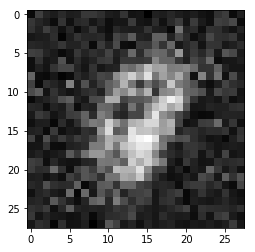

Number batches 78
4(0/78) D: 0.2207, G: 2.0950
4(1/78) D: 0.2200, G: 2.0264
4(2/78) D: 0.2376, G: 1.7560
4(3/78) D: 0.2977, G: 2.0178
4(4/78) D: 0.3524, G: 1.4524
4(5/78) D: 0.3893, G: 2.6429
4(6/78) D: 0.4850, G: 0.7726
4(7/78) D: 0.6167, G: 2.2803
4(8/78) D: 0.3444, G: 2.0470
4(9/78) D: 0.2769, G: 1.8212
4(10/78) D: 0.2685, G: 1.8661
4(11/78) D: 0.2863, G: 1.8613
4(12/78) D: 0.3117, G: 1.7109
4(13/78) D: 0.3031, G: 2.4949
4(14/78) D: 0.3215, G: 1.8358
4(15/78) D: 0.2891, G: 2.8242
4(16/78) D: 0.2925, G: 1.6849
4(17/78) D: 0.3601, G: 3.4720
4(18/78) D: 0.6784, G: 0.5709
4(19/78) D: 0.9100, G: 2.2138
4(20/78) D: 0.2216, G: 3.1229
4(21/78) D: 0.4152, G: 1.3090
4(22/78) D: 0.3661, G: 1.8765
4(23/78) D: 0.3073, G: 2.2724
4(24/78) D: 0.3769, G: 1.2195
4(25/78) D: 0.4571, G: 2.8994
4(26/78) D: 0.4542, G: 0.8374
4(27/78) D: 0.6191, G: 2.7759
4(28/78) D: 0.4168, G: 1.6014
4(29/78) D: 0.3064, G: 1.5527
4(30/78) D: 0.3109, G: 2.0113
4(31/78) D: 0.3072, G: 1.7283
4(32/78) D: 0.3333, G: 1.7738
4(

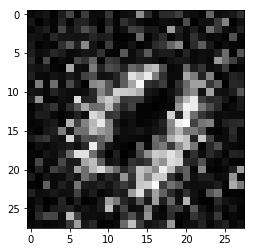

Number batches 78
5(0/78) D: 1.0369, G: 0.7690
5(1/78) D: 1.3336, G: 2.3050
5(2/78) D: 0.2133, G: 4.0041
5(3/78) D: 0.1948, G: 3.5299
5(4/78) D: 0.2087, G: 2.2379
5(5/78) D: 0.2394, G: 2.0986
5(6/78) D: 0.3097, G: 2.4038
5(7/78) D: 0.3349, G: 2.4749
5(8/78) D: 0.3937, G: 1.4500
5(9/78) D: 0.4733, G: 2.5376
5(10/78) D: 0.4067, G: 1.6517
5(11/78) D: 0.4093, G: 2.3833
5(12/78) D: 0.4361, G: 1.1127
5(13/78) D: 0.5769, G: 4.3413
5(14/78) D: 0.7835, G: 0.5479
5(15/78) D: 0.7638, G: 2.5364
5(16/78) D: 0.2819, G: 2.7042
5(17/78) D: 0.2883, G: 1.5972
5(18/78) D: 0.3350, G: 2.2354
5(19/78) D: 0.3065, G: 2.2067
5(20/78) D: 0.3413, G: 1.9278
5(21/78) D: 0.3822, G: 2.4390
5(22/78) D: 0.3901, G: 1.6441
5(23/78) D: 0.4436, G: 2.3531
5(24/78) D: 0.5029, G: 1.0043
5(25/78) D: 0.5788, G: 3.7435
5(26/78) D: 0.6622, G: 1.1614
5(27/78) D: 0.4098, G: 1.6277
5(28/78) D: 0.2573, G: 2.3155
5(29/78) D: 0.2589, G: 1.8459
5(30/78) D: 0.2425, G: 2.1183
5(31/78) D: 0.2250, G: 2.3882
5(32/78) D: 0.2172, G: 2.1417
5(

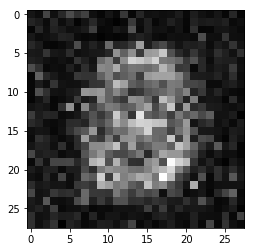

Number batches 78
6(0/78) D: 0.3657, G: 2.3900
6(1/78) D: 0.4126, G: 1.2278
6(2/78) D: 0.4003, G: 2.6125
6(3/78) D: 0.4514, G: 0.6959
6(4/78) D: 0.6023, G: 3.3677
6(5/78) D: 0.5123, G: 1.3144
6(6/78) D: 0.3554, G: 1.5461
6(7/78) D: 0.3026, G: 2.0759
6(8/78) D: 0.3155, G: 1.5926
6(9/78) D: 0.3708, G: 1.8771
6(10/78) D: 0.3384, G: 1.8797
6(11/78) D: 0.3107, G: 2.0926
6(12/78) D: 0.3375, G: 1.6757
6(13/78) D: 0.3648, G: 2.3179
6(14/78) D: 0.3198, G: 2.0533
6(15/78) D: 0.3046, G: 1.7646
6(16/78) D: 0.2914, G: 2.6716
6(17/78) D: 0.3255, G: 1.0798
6(18/78) D: 0.4738, G: 3.2563
6(19/78) D: 0.6419, G: 0.6354
6(20/78) D: 0.6185, G: 2.4792
6(21/78) D: 0.3236, G: 2.1283
6(22/78) D: 0.2544, G: 1.4630
6(23/78) D: 0.2772, G: 1.8653
6(24/78) D: 0.2496, G: 2.0319
6(25/78) D: 0.3074, G: 1.6826
6(26/78) D: 0.2792, G: 2.1536
6(27/78) D: 0.3157, G: 2.0858
6(28/78) D: 0.2797, G: 2.2757
6(29/78) D: 0.3290, G: 1.8904
6(30/78) D: 0.4259, G: 2.1880
6(31/78) D: 0.4532, G: 1.2355
6(32/78) D: 0.5228, G: 2.9247
6(

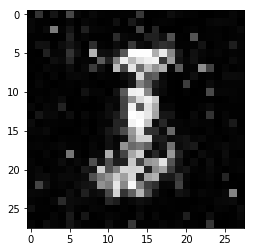

Number batches 78
7(0/78) D: 0.3166, G: 2.7032
7(1/78) D: 0.3305, G: 1.7766
7(2/78) D: 0.2916, G: 2.6687
7(3/78) D: 0.2779, G: 1.7252
7(4/78) D: 0.2815, G: 2.7615
7(5/78) D: 0.2291, G: 2.0699
7(6/78) D: 0.2307, G: 2.9377
7(7/78) D: 0.2357, G: 2.0003
7(8/78) D: 0.2610, G: 2.9554
7(9/78) D: 0.2946, G: 1.7947
7(10/78) D: 0.2702, G: 4.2818
7(11/78) D: 0.5088, G: 0.5271
7(12/78) D: 0.7784, G: 5.0176
7(13/78) D: 1.1357, G: 1.6692
7(14/78) D: 0.2373, G: 1.1460
7(15/78) D: 0.3516, G: 2.3162
7(16/78) D: 0.1695, G: 2.7336
7(17/78) D: 0.2352, G: 2.0698
7(18/78) D: 0.1938, G: 1.8463
7(19/78) D: 0.1917, G: 2.4586
7(20/78) D: 0.2077, G: 2.3790
7(21/78) D: 0.2151, G: 1.9690
7(22/78) D: 0.2322, G: 2.2339
7(23/78) D: 0.2610, G: 2.0203
7(24/78) D: 0.3045, G: 2.1759
7(25/78) D: 0.3048, G: 1.8439
7(26/78) D: 0.3229, G: 2.4739
7(27/78) D: 0.2823, G: 1.8072
7(28/78) D: 0.3040, G: 2.3076
7(29/78) D: 0.3169, G: 1.8183
7(30/78) D: 0.2812, G: 3.1241
7(31/78) D: 0.2408, G: 2.2061
7(32/78) D: 0.2578, G: 1.9986
7(

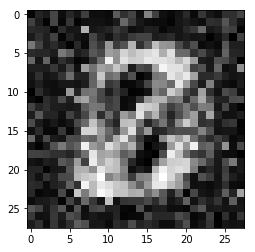

Number batches 78
8(0/78) D: 0.3288, G: 2.0204
8(1/78) D: 0.3125, G: 1.6783
8(2/78) D: 0.3554, G: 1.5267
8(3/78) D: 0.3896, G: 2.3643
8(4/78) D: 0.3916, G: 1.2910
8(5/78) D: 0.3872, G: 2.1589
8(6/78) D: 0.3848, G: 2.0753
8(7/78) D: 0.3571, G: 1.9261
8(8/78) D: 0.3889, G: 1.3328
8(9/78) D: 0.4757, G: 3.1949
8(10/78) D: 0.3872, G: 1.7624
8(11/78) D: 0.3400, G: 1.3503
8(12/78) D: 0.4780, G: 3.1559
8(13/78) D: 0.6370, G: 0.6380
8(14/78) D: 0.7015, G: 3.2123
8(15/78) D: 0.4143, G: 2.6578
8(16/78) D: 0.3297, G: 1.3910
8(17/78) D: 0.4355, G: 2.2822
8(18/78) D: 0.3457, G: 1.9099
8(19/78) D: 0.3045, G: 1.5929
8(20/78) D: 0.3152, G: 2.1919
8(21/78) D: 0.2914, G: 1.9507
8(22/78) D: 0.2721, G: 1.8220
8(23/78) D: 0.3414, G: 1.9170
8(24/78) D: 0.3233, G: 1.9295
8(25/78) D: 0.3055, G: 1.8978
8(26/78) D: 0.2611, G: 2.1519
8(27/78) D: 0.2822, G: 1.9244
8(28/78) D: 0.3048, G: 2.3007
8(29/78) D: 0.2454, G: 2.4885
8(30/78) D: 0.2366, G: 1.9407
8(31/78) D: 0.2872, G: 2.9403
8(32/78) D: 0.3118, G: 1.5332
8(

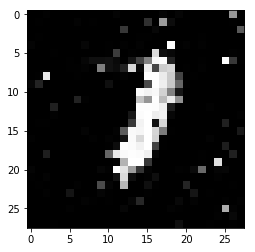

Number batches 78
9(0/78) D: 0.2596, G: 2.4866
9(1/78) D: 0.2218, G: 2.5016
9(2/78) D: 0.2498, G: 1.9947
9(3/78) D: 0.2832, G: 2.0296
9(4/78) D: 0.2970, G: 2.5842
9(5/78) D: 0.2260, G: 2.7788
9(6/78) D: 0.1837, G: 2.8327
9(7/78) D: 0.2901, G: 1.3654
9(8/78) D: 0.3963, G: 5.0551
9(9/78) D: 0.5748, G: 2.4943
9(10/78) D: 0.1663, G: 1.8283
9(11/78) D: 0.2487, G: 3.2109
9(12/78) D: 0.2591, G: 2.0451
9(13/78) D: 0.2313, G: 2.8517
9(14/78) D: 0.2102, G: 2.7433
9(15/78) D: 0.1798, G: 2.3021
9(16/78) D: 0.1804, G: 2.7481
9(17/78) D: 0.1763, G: 2.4782
9(18/78) D: 0.1905, G: 3.1005
9(19/78) D: 0.1945, G: 2.7068
9(20/78) D: 0.1916, G: 2.9969
9(21/78) D: 0.2191, G: 2.2271
9(22/78) D: 0.2704, G: 3.3603
9(23/78) D: 0.3026, G: 1.5928
9(24/78) D: 0.4159, G: 5.1710
9(25/78) D: 0.6503, G: 1.1305
9(26/78) D: 0.5534, G: 3.7417
9(27/78) D: 0.2746, G: 3.0097
9(28/78) D: 0.1504, G: 2.4009
9(29/78) D: 0.1902, G: 3.2780
9(30/78) D: 0.1474, G: 2.8207
9(31/78) D: 0.1579, G: 2.4880
9(32/78) D: 0.1885, G: 2.9323
9(

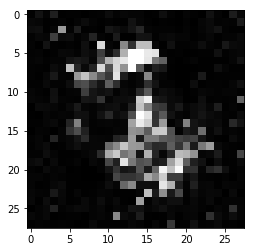

Number batches 78
10(0/78) D: 0.4448, G: 3.6853
10(1/78) D: 0.4524, G: 1.4065
10(2/78) D: 0.5146, G: 4.3014
10(3/78) D: 0.5820, G: 0.8709
10(4/78) D: 0.6316, G: 4.4313
10(5/78) D: 0.6709, G: 2.0682
10(6/78) D: 0.3405, G: 1.6993
10(7/78) D: 0.3266, G: 2.9904
10(8/78) D: 0.3147, G: 2.3084
10(9/78) D: 0.3652, G: 1.1734
10(10/78) D: 0.4090, G: 2.9187
10(11/78) D: 0.3063, G: 2.0413
10(12/78) D: 0.3920, G: 2.2035
10(13/78) D: 0.3340, G: 1.7756
10(14/78) D: 0.3211, G: 2.6642
10(15/78) D: 0.2735, G: 1.9202
10(16/78) D: 0.2949, G: 2.3576
10(17/78) D: 0.2947, G: 2.3941
10(18/78) D: 0.3704, G: 1.6735
10(19/78) D: 0.4747, G: 4.1115
10(20/78) D: 0.5359, G: 1.1959
10(21/78) D: 0.4048, G: 2.7191
10(22/78) D: 0.3331, G: 2.1168
10(23/78) D: 0.2941, G: 1.8594
10(24/78) D: 0.3200, G: 2.6255
10(25/78) D: 0.3015, G: 1.6627
10(26/78) D: 0.3024, G: 2.4176
10(27/78) D: 0.2425, G: 2.4358
10(28/78) D: 0.2447, G: 2.5970
10(29/78) D: 0.2716, G: 2.1304
10(30/78) D: 0.2834, G: 2.5065
10(31/78) D: 0.2931, G: 1.9159


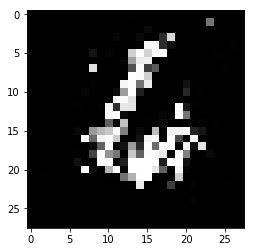

Number batches 78
11(0/78) D: 0.2267, G: 2.9888
11(1/78) D: 0.2508, G: 2.0569
11(2/78) D: 0.3057, G: 2.9673
11(3/78) D: 0.2970, G: 1.6530
11(4/78) D: 0.2861, G: 3.5436
11(5/78) D: 0.3303, G: 1.9523
11(6/78) D: 0.2381, G: 3.3514
11(7/78) D: 0.2825, G: 1.8844
11(8/78) D: 0.3618, G: 3.0132
11(9/78) D: 0.3005, G: 2.3461
11(10/78) D: 0.2735, G: 2.9160
11(11/78) D: 0.3861, G: 1.2507
11(12/78) D: 0.4776, G: 4.7094
11(13/78) D: 0.6018, G: 1.9366
11(14/78) D: 0.3067, G: 1.7811
11(15/78) D: 0.2636, G: 2.9072
11(16/78) D: 0.2859, G: 1.9652
11(17/78) D: 0.2459, G: 2.2958
11(18/78) D: 0.2133, G: 2.3997
11(19/78) D: 0.2342, G: 2.6257
11(20/78) D: 0.2145, G: 2.0933
11(21/78) D: 0.2861, G: 2.3851
11(22/78) D: 0.2851, G: 2.7863
11(23/78) D: 0.2828, G: 2.4827
11(24/78) D: 0.2480, G: 2.3872
11(25/78) D: 0.2609, G: 2.5532
11(26/78) D: 0.3329, G: 2.2459
11(27/78) D: 0.3438, G: 2.7623
11(28/78) D: 0.3264, G: 2.4564
11(29/78) D: 0.2159, G: 2.8028
11(30/78) D: 0.2446, G: 2.9360
11(31/78) D: 0.2076, G: 2.7844


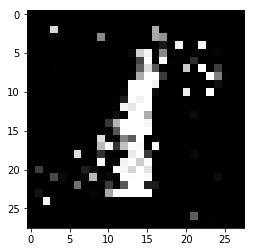

Number batches 78
12(0/78) D: 0.4826, G: 1.6618
12(1/78) D: 0.3277, G: 3.2407
12(2/78) D: 0.3425, G: 1.8833
12(3/78) D: 0.2902, G: 2.7641
12(4/78) D: 0.3026, G: 2.2475
12(5/78) D: 0.2499, G: 2.7722
12(6/78) D: 0.2196, G: 2.8730
12(7/78) D: 0.3676, G: 1.4910
12(8/78) D: 0.4753, G: 4.0235
12(9/78) D: 0.4411, G: 1.4935
12(10/78) D: 0.4107, G: 4.4989
12(11/78) D: 0.5816, G: 1.8242
12(12/78) D: 0.3017, G: 2.1115
12(13/78) D: 0.2744, G: 2.9599
12(14/78) D: 0.2946, G: 2.1096
12(15/78) D: 0.2473, G: 2.4833
12(16/78) D: 0.2317, G: 2.5484
12(17/78) D: 0.2579, G: 2.3780
12(18/78) D: 0.2997, G: 2.1030
12(19/78) D: 0.2547, G: 2.8094
12(20/78) D: 0.2385, G: 3.0409
12(21/78) D: 0.2677, G: 2.2009
12(22/78) D: 0.3139, G: 3.4699
12(23/78) D: 0.4581, G: 0.4902
12(24/78) D: 1.0911, G: 7.7029
12(25/78) D: 2.3334, G: 3.2495
12(26/78) D: 0.5190, G: 0.7436
12(27/78) D: 0.7652, G: 2.1559
12(28/78) D: 0.2842, G: 3.0606
12(29/78) D: 0.2442, G: 2.7225
12(30/78) D: 0.2131, G: 2.1248
12(31/78) D: 0.2227, G: 2.1921


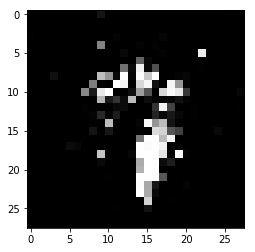

Number batches 78
13(0/78) D: 0.2153, G: 2.5599
13(1/78) D: 0.2127, G: 2.0849
13(2/78) D: 0.2572, G: 2.8221
13(3/78) D: 0.2754, G: 2.0373
13(4/78) D: 0.2348, G: 2.8636
13(5/78) D: 0.2371, G: 2.9639
13(6/78) D: 0.1976, G: 2.4258
13(7/78) D: 0.2272, G: 2.9424
13(8/78) D: 0.2706, G: 2.3280
13(9/78) D: 0.2533, G: 2.6167
13(10/78) D: 0.2560, G: 3.3003
13(11/78) D: 0.2782, G: 1.9631
13(12/78) D: 0.3250, G: 2.9162
13(13/78) D: 0.3892, G: 1.7306
13(14/78) D: 0.4016, G: 3.5834
13(15/78) D: 0.4083, G: 2.0429
13(16/78) D: 0.3696, G: 2.7895
13(17/78) D: 0.2718, G: 2.9001
13(18/78) D: 0.3189, G: 1.4256
13(19/78) D: 0.3576, G: 4.0334
13(20/78) D: 0.5207, G: 1.7042
13(21/78) D: 0.3364, G: 2.0603
13(22/78) D: 0.2577, G: 2.7609
13(23/78) D: 0.2051, G: 2.6041
13(24/78) D: 0.2219, G: 1.9638
13(25/78) D: 0.2284, G: 2.7634
13(26/78) D: 0.2362, G: 2.3183
13(27/78) D: 0.2138, G: 2.6407
13(28/78) D: 0.2507, G: 2.4476
13(29/78) D: 0.2330, G: 2.0103
13(30/78) D: 0.3219, G: 3.9153
13(31/78) D: 0.3252, G: 2.3112


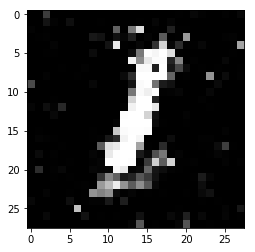

Number batches 78
14(0/78) D: 0.4907, G: 2.0883
14(1/78) D: 0.3520, G: 2.3717
14(2/78) D: 0.2932, G: 2.7876
14(3/78) D: 0.2697, G: 2.0582
14(4/78) D: 0.2606, G: 2.9999
14(5/78) D: 0.2374, G: 2.3501
14(6/78) D: 0.2329, G: 2.9321
14(7/78) D: 0.2350, G: 2.7519
14(8/78) D: 0.2914, G: 1.4713
14(9/78) D: 0.4254, G: 4.8143
14(10/78) D: 0.5610, G: 1.4363
14(11/78) D: 0.4095, G: 3.0170
14(12/78) D: 0.2725, G: 2.4814
14(13/78) D: 0.2538, G: 2.0423
14(14/78) D: 0.2286, G: 2.6996
14(15/78) D: 0.2175, G: 2.5513
14(16/78) D: 0.2183, G: 1.9852
14(17/78) D: 0.2501, G: 3.3752
14(18/78) D: 0.2815, G: 2.0614
14(19/78) D: 0.2132, G: 2.4627
14(20/78) D: 0.2115, G: 2.9686
14(21/78) D: 0.2871, G: 1.7921
14(22/78) D: 0.3254, G: 3.9771
14(23/78) D: 0.4595, G: 1.1186
14(24/78) D: 0.4253, G: 3.6901
14(25/78) D: 0.5095, G: 1.6191
14(26/78) D: 0.3268, G: 2.1450
14(27/78) D: 0.2398, G: 3.1317
14(28/78) D: 0.2433, G: 2.6622
14(29/78) D: 0.2134, G: 1.9931
14(30/78) D: 0.2714, G: 2.9926
14(31/78) D: 0.2495, G: 1.9768


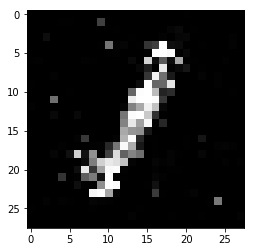

Number batches 78
15(0/78) D: 0.3884, G: 2.2021
15(1/78) D: 0.2630, G: 1.4059
15(2/78) D: 0.3103, G: 2.5041
15(3/78) D: 0.2968, G: 2.2642
15(4/78) D: 0.2748, G: 1.7748
15(5/78) D: 0.2655, G: 2.9995
15(6/78) D: 0.2750, G: 2.3243
15(7/78) D: 0.2569, G: 2.0120
15(8/78) D: 0.2704, G: 2.2712
15(9/78) D: 0.2172, G: 2.6735
15(10/78) D: 0.1742, G: 2.7199
15(11/78) D: 0.2289, G: 1.8601
15(12/78) D: 0.2485, G: 3.4717
15(13/78) D: 0.2926, G: 2.0389
15(14/78) D: 0.2195, G: 2.7473
15(15/78) D: 0.1987, G: 2.9243
15(16/78) D: 0.2398, G: 1.7498
15(17/78) D: 0.2862, G: 4.0622
15(18/78) D: 0.3488, G: 1.9839
15(19/78) D: 0.2205, G: 2.6539
15(20/78) D: 0.1822, G: 2.9498
15(21/78) D: 0.2333, G: 2.0517
15(22/78) D: 0.2258, G: 3.3357
15(23/78) D: 0.2245, G: 2.3429
15(24/78) D: 0.2121, G: 2.3966
15(25/78) D: 0.2238, G: 3.2225
15(26/78) D: 0.2691, G: 1.8469
15(27/78) D: 0.2658, G: 3.7758
15(28/78) D: 0.2370, G: 2.7199
15(29/78) D: 0.2203, G: 1.9374
15(30/78) D: 0.2482, G: 3.3196
15(31/78) D: 0.3128, G: 1.5816


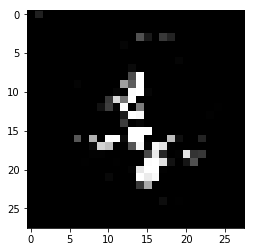

Number batches 78
16(0/78) D: 0.2274, G: 2.8459
16(1/78) D: 0.2010, G: 2.3718
16(2/78) D: 0.2554, G: 2.7928
16(3/78) D: 0.2199, G: 2.6540
16(4/78) D: 0.2779, G: 2.0372
16(5/78) D: 0.3166, G: 2.8065
16(6/78) D: 0.2608, G: 2.8882
16(7/78) D: 0.2276, G: 2.6428
16(8/78) D: 0.3704, G: 2.2010
16(9/78) D: 0.3332, G: 3.2788
16(10/78) D: 0.3461, G: 2.1903
16(11/78) D: 0.3391, G: 2.6435
16(12/78) D: 0.2869, G: 2.7244
16(13/78) D: 0.3305, G: 2.0798
16(14/78) D: 0.3067, G: 3.6761
16(15/78) D: 0.3262, G: 1.8838
16(16/78) D: 0.3239, G: 3.1409
16(17/78) D: 0.2332, G: 3.0031
16(18/78) D: 0.3906, G: 1.5764
16(19/78) D: 0.3356, G: 3.4603
16(20/78) D: 0.2845, G: 2.4758
16(21/78) D: 0.2499, G: 1.9217
16(22/78) D: 0.2601, G: 3.5819
16(23/78) D: 0.2655, G: 1.8411
16(24/78) D: 0.3122, G: 3.0442
16(25/78) D: 0.3204, G: 1.8677
16(26/78) D: 0.3346, G: 3.9415
16(27/78) D: 0.3492, G: 2.2080
16(28/78) D: 0.2715, G: 3.6728
16(29/78) D: 0.2720, G: 2.3070
16(30/78) D: 0.3629, G: 3.5697
16(31/78) D: 0.2419, G: 2.6466


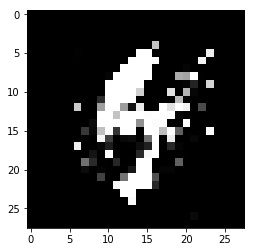

Number batches 78
17(0/78) D: 0.4780, G: 1.7896
17(1/78) D: 0.2975, G: 2.8603
17(2/78) D: 0.3011, G: 2.5063
17(3/78) D: 0.3823, G: 1.3324
17(4/78) D: 0.3888, G: 3.1524
17(5/78) D: 0.3229, G: 2.3971
17(6/78) D: 0.3204, G: 1.8502
17(7/78) D: 0.2888, G: 2.4871
17(8/78) D: 0.3480, G: 1.9896
17(9/78) D: 0.2814, G: 2.6831
17(10/78) D: 0.2571, G: 2.3054
17(11/78) D: 0.2409, G: 2.4088
17(12/78) D: 0.2819, G: 2.9423
17(13/78) D: 0.3474, G: 2.0372
17(14/78) D: 0.3145, G: 2.5647
17(15/78) D: 0.2862, G: 3.0669
17(16/78) D: 0.3004, G: 1.9161
17(17/78) D: 0.2860, G: 4.1624
17(18/78) D: 0.4758, G: 1.5692
17(19/78) D: 0.4128, G: 2.8814
17(20/78) D: 0.3177, G: 2.8818
17(21/78) D: 0.3181, G: 1.4670
17(22/78) D: 0.3518, G: 2.9252
17(23/78) D: 0.2733, G: 2.3484
17(24/78) D: 0.2637, G: 1.7684
17(25/78) D: 0.3421, G: 1.9036
17(26/78) D: 0.3361, G: 3.2574
17(27/78) D: 0.3468, G: 1.4218
17(28/78) D: 0.4114, G: 3.5047
17(29/78) D: 0.3174, G: 2.6395
17(30/78) D: 0.3678, G: 1.3265
17(31/78) D: 0.3269, G: 3.2206


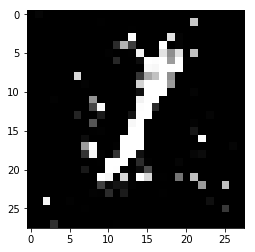

Number batches 78
18(0/78) D: 0.2039, G: 3.2644
18(1/78) D: 0.1354, G: 2.8556
18(2/78) D: 0.1957, G: 2.0287
18(3/78) D: 0.2352, G: 3.6722
18(4/78) D: 0.2132, G: 1.9493
18(5/78) D: 0.1786, G: 3.0598
18(6/78) D: 0.1452, G: 3.1641
18(7/78) D: 0.1533, G: 2.3551
18(8/78) D: 0.2158, G: 2.9359
18(9/78) D: 0.2431, G: 2.0400
18(10/78) D: 0.1732, G: 4.2023
18(11/78) D: 0.2700, G: 2.0070
18(12/78) D: 0.2524, G: 3.5810
18(13/78) D: 0.3022, G: 1.9994
18(14/78) D: 0.2250, G: 3.8198
18(15/78) D: 0.2138, G: 2.4291
18(16/78) D: 0.1619, G: 3.1918
18(17/78) D: 0.1710, G: 3.0612
18(18/78) D: 0.2328, G: 1.7294
18(19/78) D: 0.2637, G: 4.7346
18(20/78) D: 0.3405, G: 2.5847
18(21/78) D: 0.2328, G: 1.9579
18(22/78) D: 0.2323, G: 4.5846
18(23/78) D: 0.3158, G: 2.6591
18(24/78) D: 0.2021, G: 2.2038
18(25/78) D: 0.2080, G: 2.9645
18(26/78) D: 0.1963, G: 2.8342
18(27/78) D: 0.1996, G: 2.8566
18(28/78) D: 0.1479, G: 3.3172
18(29/78) D: 0.1561, G: 2.8449
18(30/78) D: 0.1768, G: 2.8079
18(31/78) D: 0.1891, G: 3.7302


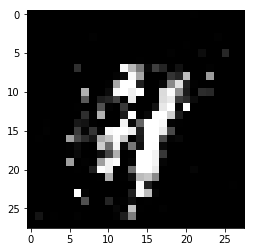

Number batches 78
19(0/78) D: 0.2249, G: 2.0813
19(1/78) D: 0.1892, G: 3.0642
19(2/78) D: 0.2594, G: 2.4127
19(3/78) D: 0.2960, G: 2.0016
19(4/78) D: 0.2718, G: 3.1909
19(5/78) D: 0.2439, G: 2.6610
19(6/78) D: 0.1742, G: 2.3581
19(7/78) D: 0.1747, G: 3.5632
19(8/78) D: 0.3543, G: 1.5956
19(9/78) D: 0.2453, G: 3.3308
19(10/78) D: 0.1969, G: 3.0603
19(11/78) D: 0.2865, G: 1.2681
19(12/78) D: 0.3423, G: 4.6188
19(13/78) D: 0.3894, G: 3.1606
19(14/78) D: 0.2398, G: 1.7616
19(15/78) D: 0.2692, G: 3.7314
19(16/78) D: 0.2414, G: 3.4837
19(17/78) D: 0.1494, G: 2.3883
19(18/78) D: 0.2737, G: 1.8446
19(19/78) D: 0.2378, G: 2.9388
19(20/78) D: 0.2174, G: 3.1188
19(21/78) D: 0.2207, G: 2.2692
19(22/78) D: 0.2452, G: 2.1989
19(23/78) D: 0.1742, G: 3.2964
19(24/78) D: 0.2373, G: 2.3812
19(25/78) D: 0.2258, G: 1.6856
19(26/78) D: 0.2733, G: 3.1540
19(27/78) D: 0.2844, G: 2.0968
19(28/78) D: 0.2430, G: 3.0251
19(29/78) D: 0.2045, G: 2.6237
19(30/78) D: 0.2595, G: 1.9806
19(31/78) D: 0.1856, G: 2.7580


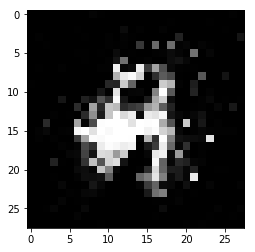

Number batches 78
20(0/78) D: 0.2631, G: 1.6669
20(1/78) D: 0.3023, G: 4.5318
20(2/78) D: 0.4780, G: 1.8800
20(3/78) D: 0.2787, G: 3.0976
20(4/78) D: 0.1925, G: 3.0056
20(5/78) D: 0.2262, G: 3.0386
20(6/78) D: 0.1822, G: 3.1800
20(7/78) D: 0.2013, G: 2.9703
20(8/78) D: 0.2269, G: 2.2343
20(9/78) D: 0.2490, G: 3.5729
20(10/78) D: 0.1880, G: 3.3510
20(11/78) D: 0.3094, G: 0.9235
20(12/78) D: 0.5833, G: 6.4568
20(13/78) D: 0.9068, G: 2.7468
20(14/78) D: 0.3281, G: 2.1299
20(15/78) D: 0.3799, G: 4.5394
20(16/78) D: 0.3609, G: 3.4886
20(17/78) D: 0.1895, G: 2.0927
20(18/78) D: 0.2535, G: 2.0711
20(19/78) D: 0.2384, G: 3.2185
20(20/78) D: 0.1970, G: 2.7225
20(21/78) D: 0.1896, G: 2.3126
20(22/78) D: 0.1990, G: 2.8260
20(23/78) D: 0.2434, G: 2.6750
20(24/78) D: 0.2693, G: 2.3920
20(25/78) D: 0.2302, G: 2.8316
20(26/78) D: 0.2817, G: 2.1607
20(27/78) D: 0.2375, G: 2.9857
20(28/78) D: 0.2124, G: 3.2321
20(29/78) D: 0.2275, G: 1.7102
20(30/78) D: 0.3285, G: 3.9563
20(31/78) D: 0.2984, G: 2.1435


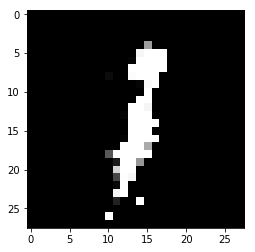

Number batches 78
21(0/78) D: 0.2418, G: 2.8405
21(1/78) D: 0.2170, G: 2.4211
21(2/78) D: 0.2942, G: 2.6866
21(3/78) D: 0.1846, G: 2.5791
21(4/78) D: 0.2030, G: 3.2163
21(5/78) D: 0.2294, G: 2.1963
21(6/78) D: 0.1996, G: 3.2520
21(7/78) D: 0.2375, G: 2.1139
21(8/78) D: 0.2953, G: 3.8190
21(9/78) D: 0.2230, G: 2.8529
21(10/78) D: 0.1292, G: 3.1315
21(11/78) D: 0.2064, G: 1.8943
21(12/78) D: 0.2927, G: 4.9232
21(13/78) D: 0.4109, G: 1.9542
21(14/78) D: 0.2599, G: 3.2184
21(15/78) D: 0.1615, G: 3.4697
21(16/78) D: 0.2446, G: 1.8950
21(17/78) D: 0.2447, G: 4.3262
21(18/78) D: 0.2895, G: 2.3245
21(19/78) D: 0.1934, G: 2.5070
21(20/78) D: 0.1635, G: 3.0572
21(21/78) D: 0.1835, G: 2.3989
21(22/78) D: 0.2206, G: 2.9855
21(23/78) D: 0.2480, G: 2.3854
21(24/78) D: 0.2323, G: 3.5248
21(25/78) D: 0.2119, G: 2.5129
21(26/78) D: 0.2429, G: 2.6531
21(27/78) D: 0.2511, G: 2.7073
21(28/78) D: 0.2119, G: 2.8721
21(29/78) D: 0.2461, G: 2.1896
21(30/78) D: 0.2063, G: 4.1603
21(31/78) D: 0.2655, G: 1.9748


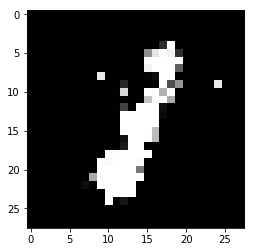

Number batches 78
22(0/78) D: 0.2077, G: 2.4004
22(1/78) D: 0.2140, G: 2.6284
22(2/78) D: 0.2326, G: 2.6287
22(3/78) D: 0.1899, G: 2.3759
22(4/78) D: 0.1944, G: 2.7445
22(5/78) D: 0.1891, G: 2.5693
22(6/78) D: 0.1987, G: 2.6943
22(7/78) D: 0.1968, G: 2.8170
22(8/78) D: 0.2598, G: 1.7148
22(9/78) D: 0.3391, G: 4.6478
22(10/78) D: 0.3100, G: 3.1026
22(11/78) D: 0.2498, G: 1.5952
22(12/78) D: 0.2912, G: 3.9039
22(13/78) D: 0.3083, G: 2.4342
22(14/78) D: 0.1979, G: 2.3650
22(15/78) D: 0.2601, G: 3.0472
22(16/78) D: 0.2067, G: 2.4805
22(17/78) D: 0.1861, G: 3.1044
22(18/78) D: 0.2222, G: 2.4575
22(19/78) D: 0.1610, G: 2.5614
22(20/78) D: 0.1943, G: 2.5931
22(21/78) D: 0.1787, G: 2.5788
22(22/78) D: 0.2016, G: 2.5813
22(23/78) D: 0.1730, G: 3.2808
22(24/78) D: 0.1926, G: 2.5699
22(25/78) D: 0.1928, G: 2.5934
22(26/78) D: 0.2566, G: 2.6019
22(27/78) D: 0.1947, G: 2.2777
22(28/78) D: 0.2124, G: 3.7904
22(29/78) D: 0.2445, G: 2.4809
22(30/78) D: 0.2002, G: 3.4861
22(31/78) D: 0.1604, G: 2.8465


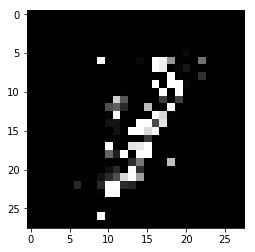

Number batches 78
23(0/78) D: 0.1981, G: 2.5882
23(1/78) D: 0.2003, G: 3.1377
23(2/78) D: 0.2167, G: 2.3272
23(3/78) D: 0.1704, G: 2.9629
23(4/78) D: 0.1573, G: 3.0521
23(5/78) D: 0.1906, G: 2.4805
23(6/78) D: 0.1478, G: 3.7242
23(7/78) D: 0.2126, G: 2.4287
23(8/78) D: 0.1973, G: 2.6598
23(9/78) D: 0.2565, G: 3.4445
23(10/78) D: 0.1191, G: 3.3702
23(11/78) D: 0.2027, G: 2.2017
23(12/78) D: 0.2129, G: 4.6796
23(13/78) D: 0.2894, G: 2.3179
23(14/78) D: 0.2127, G: 3.8031
23(15/78) D: 0.2120, G: 3.0109
23(16/78) D: 0.1572, G: 2.3720
23(17/78) D: 0.1575, G: 4.4386
23(18/78) D: 0.2319, G: 2.4317
23(19/78) D: 0.1995, G: 4.3274
23(20/78) D: 0.2129, G: 2.7499
23(21/78) D: 0.1491, G: 2.6277
23(22/78) D: 0.2298, G: 4.7290
23(23/78) D: 0.2085, G: 2.7977
23(24/78) D: 0.1971, G: 3.3533
23(25/78) D: 0.1480, G: 2.5369
23(26/78) D: 0.2200, G: 3.1711
23(27/78) D: 0.2227, G: 2.2217
23(28/78) D: 0.1986, G: 5.0133
23(29/78) D: 0.3167, G: 2.0897
23(30/78) D: 0.2390, G: 3.9823
23(31/78) D: 0.1440, G: 3.7191


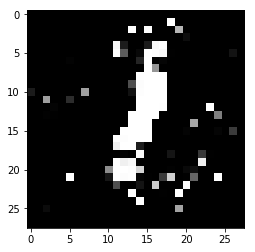

Number batches 78
24(0/78) D: 0.2265, G: 2.7978
24(1/78) D: 0.2332, G: 2.8643
24(2/78) D: 0.2060, G: 2.7722
24(3/78) D: 0.2468, G: 1.8073
24(4/78) D: 0.2248, G: 4.8127
24(5/78) D: 0.3806, G: 2.6681
24(6/78) D: 0.2265, G: 2.7519
24(7/78) D: 0.2205, G: 3.5578
24(8/78) D: 0.2787, G: 2.1468
24(9/78) D: 0.2859, G: 3.2806
24(10/78) D: 0.2280, G: 3.1263
24(11/78) D: 0.2431, G: 2.8121
24(12/78) D: 0.2321, G: 3.0910
24(13/78) D: 0.2646, G: 2.1840
24(14/78) D: 0.2347, G: 3.7775
24(15/78) D: 0.2336, G: 2.5014
24(16/78) D: 0.2389, G: 3.1036
24(17/78) D: 0.1649, G: 3.1787
24(18/78) D: 0.2929, G: 2.1063
24(19/78) D: 0.2375, G: 2.7361
24(20/78) D: 0.2090, G: 3.1894
24(21/78) D: 0.2154, G: 2.0217
24(22/78) D: 0.2780, G: 4.3423
24(23/78) D: 0.2487, G: 3.0116
24(24/78) D: 0.2445, G: 2.8737
24(25/78) D: 0.2118, G: 3.2391
24(26/78) D: 0.2264, G: 2.4409
24(27/78) D: 0.2184, G: 3.3555
24(28/78) D: 0.1851, G: 3.3079
24(29/78) D: 0.2693, G: 1.8289
24(30/78) D: 0.3393, G: 5.5771
24(31/78) D: 0.3674, G: 3.1049


In [ ]:
# Keep this. 
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Train the discriminator using the generated images and the real images.
        # Contains the real and fake images.
        X = np.concatenate((generated_images, real_images))
        
        # Labels if the sample is real (1) or not real (0). 
        y = [0] * batch_size + [1] * batch_size
        
        # Remember that the discriminator has to have d.trainable = True!
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Get the g_loss (fill in the ... part between the parantheses)
        g_loss = dg.train_on_batch(noise, [1]*batch_size)
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))

# Why is my generative loss oscillating???   
# Don't worry this is normal as the generator is oscillating between possible solutions
        